# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 8 - Normal modes and Schrodinger equation

In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

In [2]:
# 4 masses, equal k and m, fixed boundaries

k = 1.0
m = 1.0

omg0_sq = k/m

T = omg0_sq* np.array([[2, -1, 0, 0],
                       [-1, 2, -1, 0],
                       [0, -1, 2, -1],
                       [0, 0, -1, 2]])

e, v = np.linalg.eigh(T)

print(e)
print(v)

[0.38196601 1.38196601 2.61803399 3.61803399]
[[-0.37174803  0.60150096  0.60150096 -0.37174803]
 [-0.60150096  0.37174803 -0.37174803  0.60150096]
 [-0.60150096 -0.37174803 -0.37174803 -0.60150096]
 [-0.37174803 -0.60150096  0.60150096  0.37174803]]


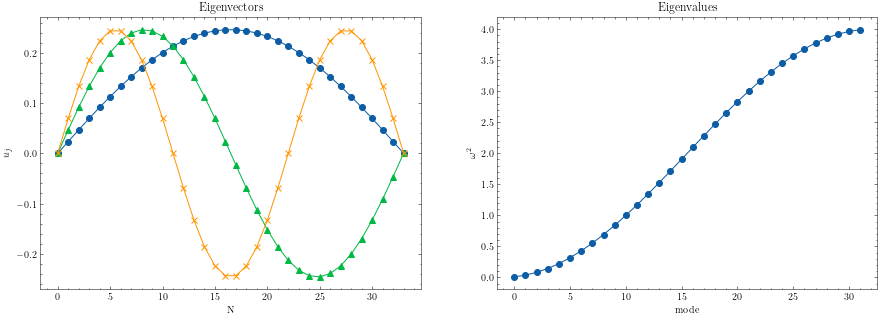

In [3]:
# 32 masses, equal k and m, fixed boundaries

N = 32
d = 2*omg0_sq*np.ones(N)
e = -omg0_sq*np.ones(N-1)

eigenval, eigenvec = linalg.eigh_tridiagonal(d,e)

def add_boundary(array, bound=0):
    array = np.insert(array, 0, bound)
    array = np.append(array, bound)
    return array

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(add_boundary(eigenvec.T[0]), marker='o')
plt.plot(add_boundary(eigenvec.T[1]), marker='^')
plt.plot(add_boundary(eigenvec.T[2]), marker='x')
plt.ylabel('$u_j$')
plt.xlabel('N')
plt.title('Eigenvectors')

plt.subplot(1,2,2)
plt.plot(eigenval, marker='o')
plt.ylabel('$\omega^2$')
plt.xlabel('mode')
plt.title('Eigenvalues')

plt.show()

In [4]:
# 4 masses, equal k and m, periodic boundaries

T = omg0_sq* np.array([[2, -1, 0, -1],
                       [-1, 2, -1, 0],
                       [0, -1, 2, -1],
                       [-1, 0, -1, 2]])

e, v = np.linalg.eigh(T)

print(e)
print(v)

[-7.54604712e-16  2.00000000e+00  2.00000000e+00  4.00000000e+00]
[[-5.00000000e-01  7.07106781e-01  0.00000000e+00 -5.00000000e-01]
 [-5.00000000e-01 -1.77885755e-16 -7.07106781e-01  5.00000000e-01]
 [-5.00000000e-01 -7.07106781e-01  2.87079964e-16 -5.00000000e-01]
 [-5.00000000e-01  1.09194209e-16  7.07106781e-01  5.00000000e-01]]


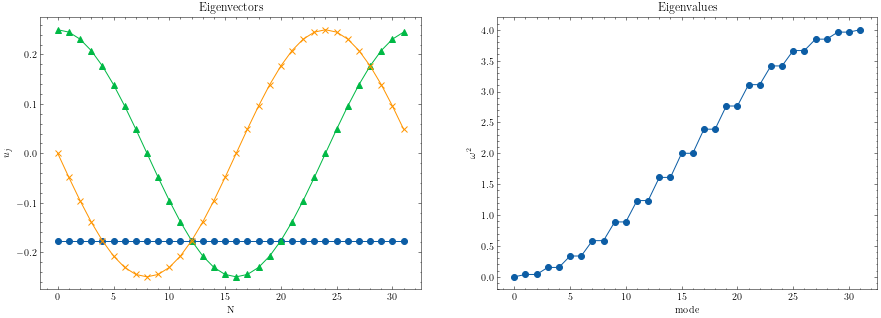

In [5]:
# 32 masses, equal k and m, periodic boundaries

T = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if i == j:
            T[i][j] = 2.0
        elif i == j+1 or i == j-1:
            T[i][j] = -1.0

T[0][-1] = -1.0
T[-1][0] = -1.0

e, v = linalg.eigh(T)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(v.T[0], marker='o')
plt.plot(v.T[1], marker='^')
plt.plot(v.T[2], marker='x')
plt.ylabel('$u_j$')
plt.xlabel('N')
plt.title('Eigenvectors')

plt.subplot(1,2,2)
plt.plot(e, marker='o')
plt.ylabel('$\omega^2$')
plt.xlabel('mode')
plt.title('Eigenvalues')

plt.show()

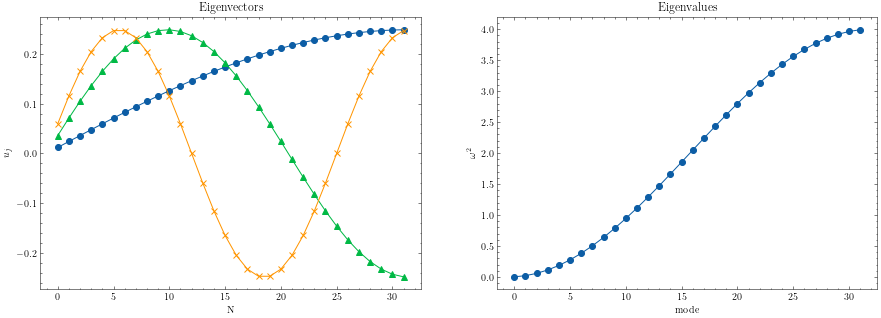

In [6]:
# 32 masses, equal k and m, open boundary

T = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if i == j:
            T[i][j] = 2.0
        elif i == j+1 or i == j-1:
            T[i][j] = -1.0

T[-1][-1] = 1.0

e, v = linalg.eigh(T)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(v.T[0], marker='o')
plt.plot(v.T[1], marker='^')
plt.plot(v.T[2], marker='x')
plt.ylabel('$u_j$')
plt.xlabel('N')
plt.title('Eigenvectors')

plt.subplot(1,2,2)
plt.plot(e, marker='o')
plt.ylabel('$\omega^2$')
plt.xlabel('mode')
plt.title('Eigenvalues')

plt.show()

In [7]:
# Four alternated masses

k = 1.0
m1 = 1.0
m2 = 1.5

T = np.array([[2*k/m1, -k/m2, 0, 0],
              [-k/m1, 2*k/m2, -k/m1, 0],
              [0, -k/m2, 2*k/m1, -k/m2],
              [0, 0, -k/m1, 2*k/m2]])

e, v = np.linalg.eigh(T)

print(e)
print(v)

[0.23976033 0.87256027 2.46077306 3.09357301]
[[-0.36195276 -0.43695803  0.68350681 -0.45921271]
 [-0.63712361 -0.49264384 -0.31494153  0.50218263]
 [-0.50218263  0.31494153 -0.49264384 -0.63712361]
 [-0.45921271  0.68350681  0.43695803  0.36195276]]


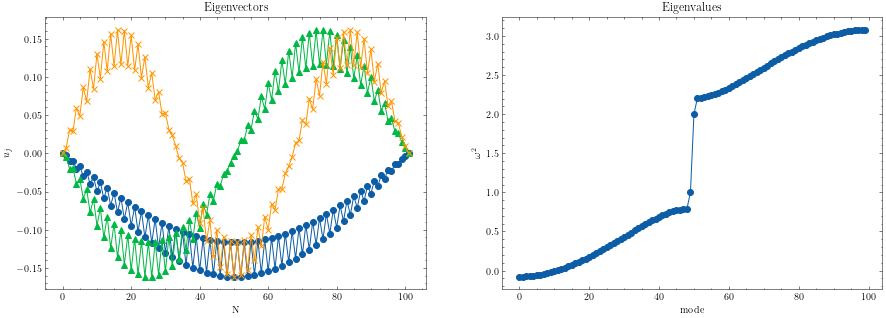

In [8]:
N = 100

T = np.zeros((N,N))

k = 1.0
m = [1.0, 2.0]

for i in range(N):
    for j in range(N):
        if i == j:
            if i % 2 == 0:
                T[i][j] = 2*k/m[0]
            else:
                T[i][j] = 2*k/m[1]
        elif i == j+1 or i == j-1:
            if i % 2 == 0:
                T[i][j] = -k/m[0]
            else:
                T[i][j] = -k/m[1]

e, v = np.linalg.eigh(T)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(add_boundary(v.T[0]), marker='o')
plt.plot(add_boundary(v.T[1]), marker='^')
plt.plot(add_boundary(v.T[2]), marker='x')
plt.ylabel('$u_j$')
plt.xlabel('N')
plt.title('Eigenvectors')

plt.subplot(1,2,2)
plt.plot(e, marker='o')
plt.ylabel('$\omega^2$')
plt.xlabel('mode')
plt.title('Eigenvalues')

plt.show()

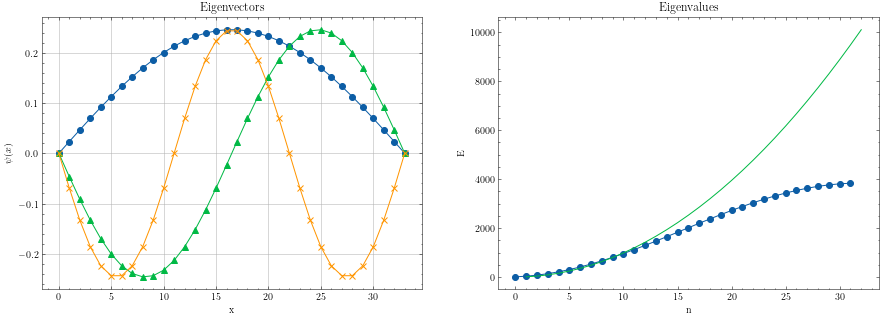

In [31]:
# Schrodinger: poço infinito

N = 32
L = 1.0
x = np.linspace(0, L, N)/L
dx = np.diff(x)[0]
n = np.arange(1, N+1)

# Potential

V = np.zeros(N)

# Building hamiltonian

H = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if i == j:
            H[i][j] = 2.0*dx**-2 + V[i]
        elif i == j+1 or i == j-1:
            H[i][j] = -1.0*dx**-2

e, v = linalg.eigh(H)

def E_exact(n):
    return (np.pi**2)*n**2

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(add_boundary(v.T[0]), marker='o')
plt.plot(add_boundary(v.T[1]), marker='^')
plt.plot(add_boundary(v.T[2]), marker='x')
plt.ylabel('$\psi(x)$')
plt.xlabel('x')
plt.grid()
plt.title('Eigenvectors')

plt.subplot(1,2,2)
plt.plot(e, marker='o')
plt.plot(n, E_exact(n))
plt.ylabel('E')
plt.xlabel('n')
plt.title('Eigenvalues')

plt.show()

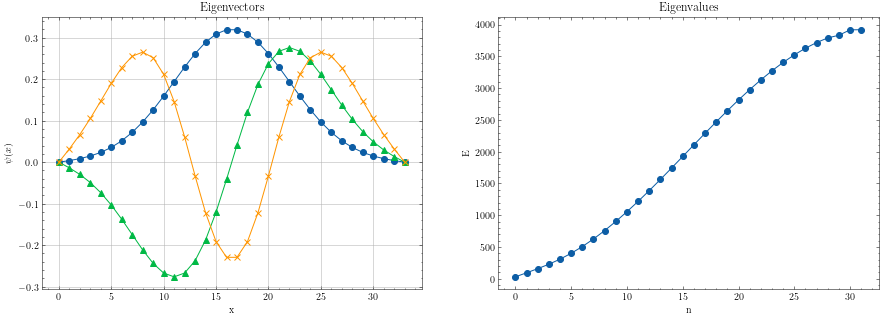

In [32]:
# Harmonic oscillator

def V(x, K=1):
    return K*(x - 0.5)**2

V = V(x, K=1000)

H = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if i == j:
            H[i][j] = 2.0*dx**-2 + V[i]
        elif i == j+1 or i == j-1:
            H[i][j] = -1.0*dx**-2

e, v = linalg.eigh(H)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(add_boundary(v.T[0]), marker='o')
plt.plot(add_boundary(v.T[1]), marker='^')
plt.plot(add_boundary(v.T[2]), marker='x')
plt.ylabel('$\psi(x)$')
plt.xlabel('x')
plt.grid()
plt.title('Eigenvectors')

plt.subplot(1,2,2)
plt.plot(e, marker='o')
#plt.plot(n, E_exact(n))
plt.ylabel('E')
plt.xlabel('n')
plt.title('Eigenvalues')

plt.show()

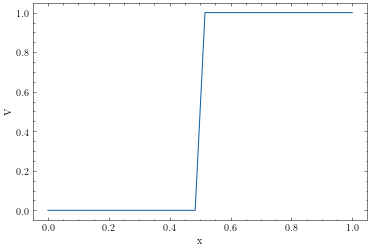

In [11]:
# Potential barrier

@np.vectorize
def V_barrier(x, alpha=1.0):
    if x > 0.5:
        return alpha
    else:
        return 0.0

plt.plot(x, V_barrier(x))
plt.xlabel('x')
plt.ylabel('V')
plt.show()

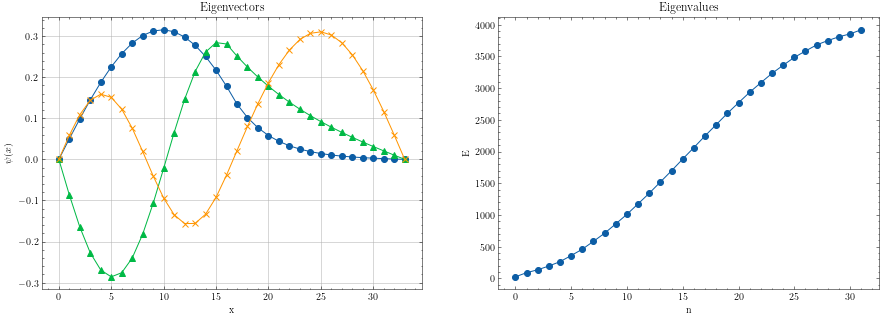

In [12]:
V = V_barrier(x, alpha=100)

H = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if i == j:
            H[i][j] = 2.0*dx**-2 + V[i]
        elif i == j+1 or i == j-1:
            H[i][j] = -1.0*dx**-2

e, v = linalg.eigh(H)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(add_boundary(v.T[0]), marker='o')
plt.plot(add_boundary(v.T[1]), marker='^')
plt.plot(add_boundary(v.T[2]), marker='x')
plt.ylabel('$\psi(x)$')
plt.xlabel('x')
plt.grid()
plt.title('Eigenvectors')

plt.subplot(1,2,2)
plt.plot(e, marker='o')
#plt.plot(n, E_exact(n))
plt.ylabel('E')
plt.xlabel('n')
plt.title('Eigenvalues')

plt.show()